# This is the 3rd task of my internship at prodigy infotech.

## The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# https://archive.ics.uci.edu/dataset/222/bank+marketing

## I have to create a decision tree.

# **PLEASE SCROLL DOWN A LITTLE AS THIS STUFF UP HERE IS JUST ME TRYING TO UNDERSTAND THING.**

# 1- Fixed the format and created a new csv files for better readability

In [35]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

bank = pd.read_csv('bank-full.csv', sep=';')

bank.to_csv('bank_test_data.csv', index=False)



In [36]:
bank_additional = pd.read_csv('bank-additional-full.csv', sep=';')

bank_additional.to_csv('bank_additional_new.csv', index=False)
bank_additional.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [38]:
subbed = bank[bank['y']=='yes']
subbed.to_csv('bank_y_subbed.csv', header=True)


In [39]:
unsubbed = bank[bank['y']=='no']
unsubbed.to_csv('bank_y_unsubbed.csv', header=True)

In [40]:
print(len(subbed),len(unsubbed), len(bank))
bank.shape

5289 39922 45211


(45211, 17)

In [41]:
subbed_add = bank_additional[bank_additional['y'] == 'yes']
unsubbed_add = bank_additional[bank_additional['y'] == 'no']
print(len(subbed_add),len(unsubbed_add),len(bank_additional))
bank_additional.shape

4640 36548 41188


(41188, 21)

In [42]:
columns_not_in_bank = bank_additional.columns.difference(bank.columns)
columns_not_in_bank

Index(['cons.conf.idx', 'cons.price.idx', 'day_of_week', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [43]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank_full.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# YOU CAN IGNORE THIS CELL

In [44]:




# print(bank.columns)

# # Convert categorical variables into numerical representations using one-hot encoding
# bank = pd.get_dummies(bank)

# # Define features and target variable
# y = bank['y_yes']
# X = bank.drop(columns=['y_yes'])  # Exclude the target column


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize DecisionTreeClassifier with default parameters
# clf = DecisionTreeClassifier()

# # Fit the classifier to your data
# clf.fit(X_train, y_train)

# # Make predictions
# y_pred = clf.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# IGNORE THIS TOO

In [45]:
# import matplotlib.pyplot as plt
# from sklearn import tree

# # Plot the decision tree
# plt.figure(figsize=(20,10))
# tree.plot_tree(clf, feature_names=X_test.columns, class_names=['no', 'yes'], filled=True)
# plt.show()


In [46]:
# def gini(x):
#     total = 0
#     for i, xi in enumerate(x[:-1], 1):
#         total += np.sum(np.abs(xi - x[i:]))
#     return total / (len(x)**2 * np.mean(x))


In [47]:
# bank_full.columns

In [48]:
# gini_indices = []

# for column in bank_full.columns:
#     print(column)
#     ginis = gini(bank_full[column])
#     print(ginis)
#     gini_indices.append((f"{column}" , ginis))
# gini_indices

# AFTER SEARCHING FOR THIS AND THAT AND TRYING TO FIND OUT HOW TO ACTUALLY DO THIS TASK I HAVE RECIEVED. I THINK I HAVE UNDERSTOOD IT.

In [49]:
# bank_dummies = pd.get_dummies(bank)
# bank_dummies.head()

In [50]:
# bank_full_dummies = pd.get_dummies(bank_full)
# bank_full_dummies.head()

# Spliting income and outcome variables

In [51]:
feature_columns= ['age','job','education','default','balance','housing','loan','poutcome']
bank_feature = bank[feature_columns]
bank_labels = bank['y']


In [52]:
bank_full_feature = bank_full[feature_columns]
bank_full_labels = bank_full['y']


In [53]:
bank_feature.shape

(45211, 8)

In [54]:
bank_full_feature.shape

(45211, 8)

In [55]:
bank_feature.head(10)

age           job  education default  balance housing loan poutcome
0   58    management   tertiary      no     2143     yes   no  unknown
1   44    technician  secondary      no       29     yes   no  unknown
2   33  entrepreneur  secondary      no        2     yes  yes  unknown
3   47   blue-collar    unknown      no     1506     yes   no  unknown
4   33       unknown    unknown      no        1      no   no  unknown
5   35    management   tertiary      no      231     yes   no  unknown
6   28    management   tertiary      no      447     yes  yes  unknown
7   42  entrepreneur   tertiary     yes        2     yes   no  unknown
8   58       retired    primary      no      121     yes   no  unknown
9   43    technician  secondary      no      593     yes   no  unknown

# Choosing train and test data

# Converting to dummies

In [56]:
train = pd.get_dummies(bank_feature)
train_labels = bank_labels
test = pd.get_dummies(bank_full_feature)
test_labels = bank_full_labels



# My updated train columns:

In [57]:
train.columns

Index(['age', 'balance', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

# Training my model

In [73]:
classifier = DecisionTreeClassifier(
    max_depth=20, 
    min_samples_split=20,  
    min_samples_leaf=10, 
    random_state=42  
)
classifier = classifier.fit(train,train_labels)
predict = classifier.predict(test)
test_labels_array = np.array(test_labels)


# Printing Accuracy Score:

In [59]:
print("the accuracy for this model is :", metrics.accuracy_score(predict,test_labels))

the accuracy for this model is : 0.8962641834951671


In [60]:
path = classifier.cost_complexity_pruning_path(train, train_labels)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Confusion Matrix to see if my model valid and accurate and doesnt overfit.

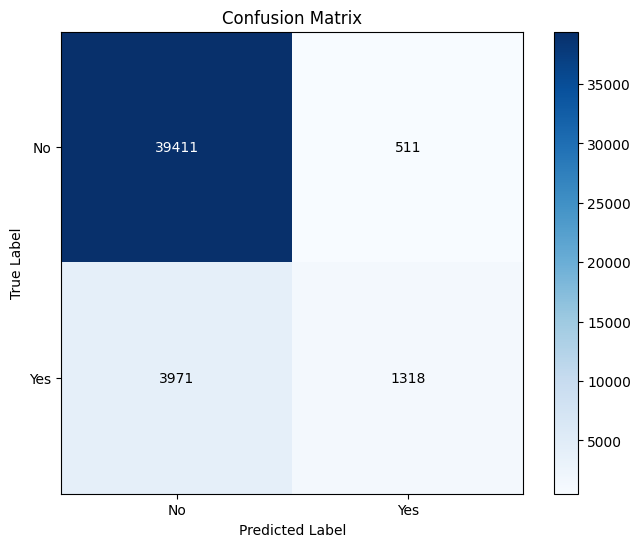

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
accuracy = accuracy_score(test_labels,predict)
precision = precision_score(test_labels,predict,average='binary',pos_label='yes')
recall = recall_score(test_labels,predict,average='binary',pos_label='yes')
f1 = f1_score(test_labels,predict,average='binary',pos_label='yes')
cm = confusion_matrix(test_labels,predict)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.show()

# Visualizing the Decision Tree

In [76]:
import graphviz
from sklearn.tree import export_graphviz, plot_tree
from six import StringIO
from IPython.display import Image
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data ,filled=True,
                rounded=True,special_characters=True, 
                feature_names=train.columns,class_names=['Yes','No'])
# Convert StringIO object to string
dot_data_str = dot_data.getvalue()
dot_data_str = 'digraph Tree {\nsize="95,20";\n' + dot_data_str.split('\n', 1)[1]
graph = graphviz.Source(dot_data_str )
graph.render("decision tree",format='png', cleanup=True)

graph

# PRUNING THE NODES

In [63]:
# path = classifier.cost_complexity_pruning_path(train, train_labels)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# pruned_models = []
# for ccp_alpha in ccp_alphas:
#     pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
#     pruned_model.fit(train, train_labels)
#     pruned_models.append(pruned_model)

# best_accuracy = 0
# best_pruned_model = None
# for pruned_model in pruned_models:
#     accuracy = pruned_model.score(test, test_labels)
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_pruned_model = pruned_model

# accuracy_after_pruning = best_pruned_model.score(test, test_labels)
# print("Accuracy after pruning:", accuracy_after_pruning)

In [64]:
# plt.figure(figsize=(15, 10))
# plot_tree(best_pruned_model, filled=True)
# plt.title("Pruned Decision Tree")
# plt.show()

# Using SMOTE to deal with class Imbalancing

In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(train, train_labels)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Predict and evaluate
pred = model.predict(test)
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

          no       0.99      1.00      1.00     39922
         yes       0.98      0.96      0.97      5289

    accuracy                           0.99     45211
   macro avg       0.99      0.98      0.98     45211
weighted avg       0.99      0.99      0.99     45211



In [78]:
classifier2 = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_split=20,  
    min_samples_leaf=10, 
    random_state=42  
)
classifier2 = classifier2.fit(train,train_labels)
predict = classifier2.predict(test)
test_labels_array = np.array(test_labels)

print("the accuracy for this model is :", metrics.accuracy_score(pred,test_labels))

the accuracy for this model is : 0.9931432615956294


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.879651 to fit


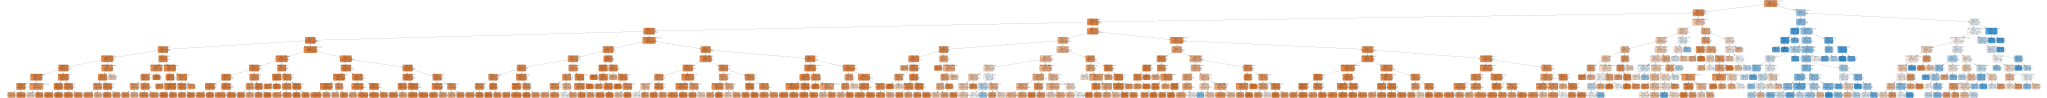

In [82]:
import graphviz
from sklearn.tree import export_graphviz, plot_tree
from six import StringIO
from IPython.display import Image
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data ,filled=True,
                rounded=True,special_characters=True, 
                feature_names=train.columns,class_names=['Yes','No'])
# Convert StringIO object to string
dot_data_str = dot_data.getvalue()
graph = graphviz.Source(dot_data_str )

dot_data_str = 'digraph Tree {\nsize="100,100";\n' + dot_data_str.split('\n', 1)[1]
graph.render("decision tree",format='png', cleanup=True)

graph

# Conclusion